#**Pattern Recognition and Machine Learning 2022 Winter Semester**

##**Lab - 3 Assignment**

###Name: Dev Goel
###Roll No: B20CS090

##Importing the Necessary Python Libraries and Components

In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pylab as plt

#**Question-1**

##**0)** Input the dataset and performing data pre-processing

In [114]:
housingData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/LAB-3/Housing.csv")
housingData.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [115]:
# Checking for null/missing/NaN values in the dataset.
housingData.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

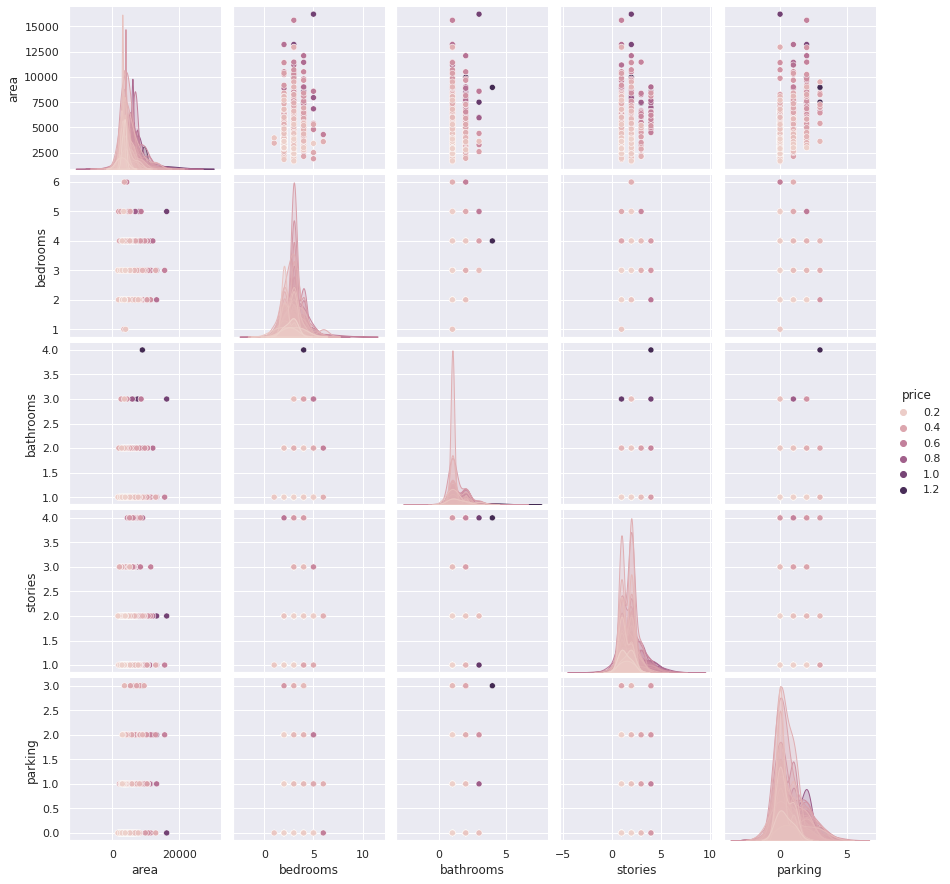

In [116]:
sns.set()
sns.pairplot(housingData, hue='price', height=2.5);

In [117]:
# Checking for categorical values in the data set
housingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [118]:
# Performing categorical encoding wherever applicable in the data
# Storing categorical data in a list.
categoricalData = []
for i in housingData.columns:
    if housingData[i].dtype == 'object':
        categoricalData.append(i)

Label_Encode = LabelEncoder()
for i in categoricalData:
    y = housingData[i]
    transform = Label_Encode.fit_transform(y)
    housingData[i] = transform
    
housingData

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [119]:
housingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


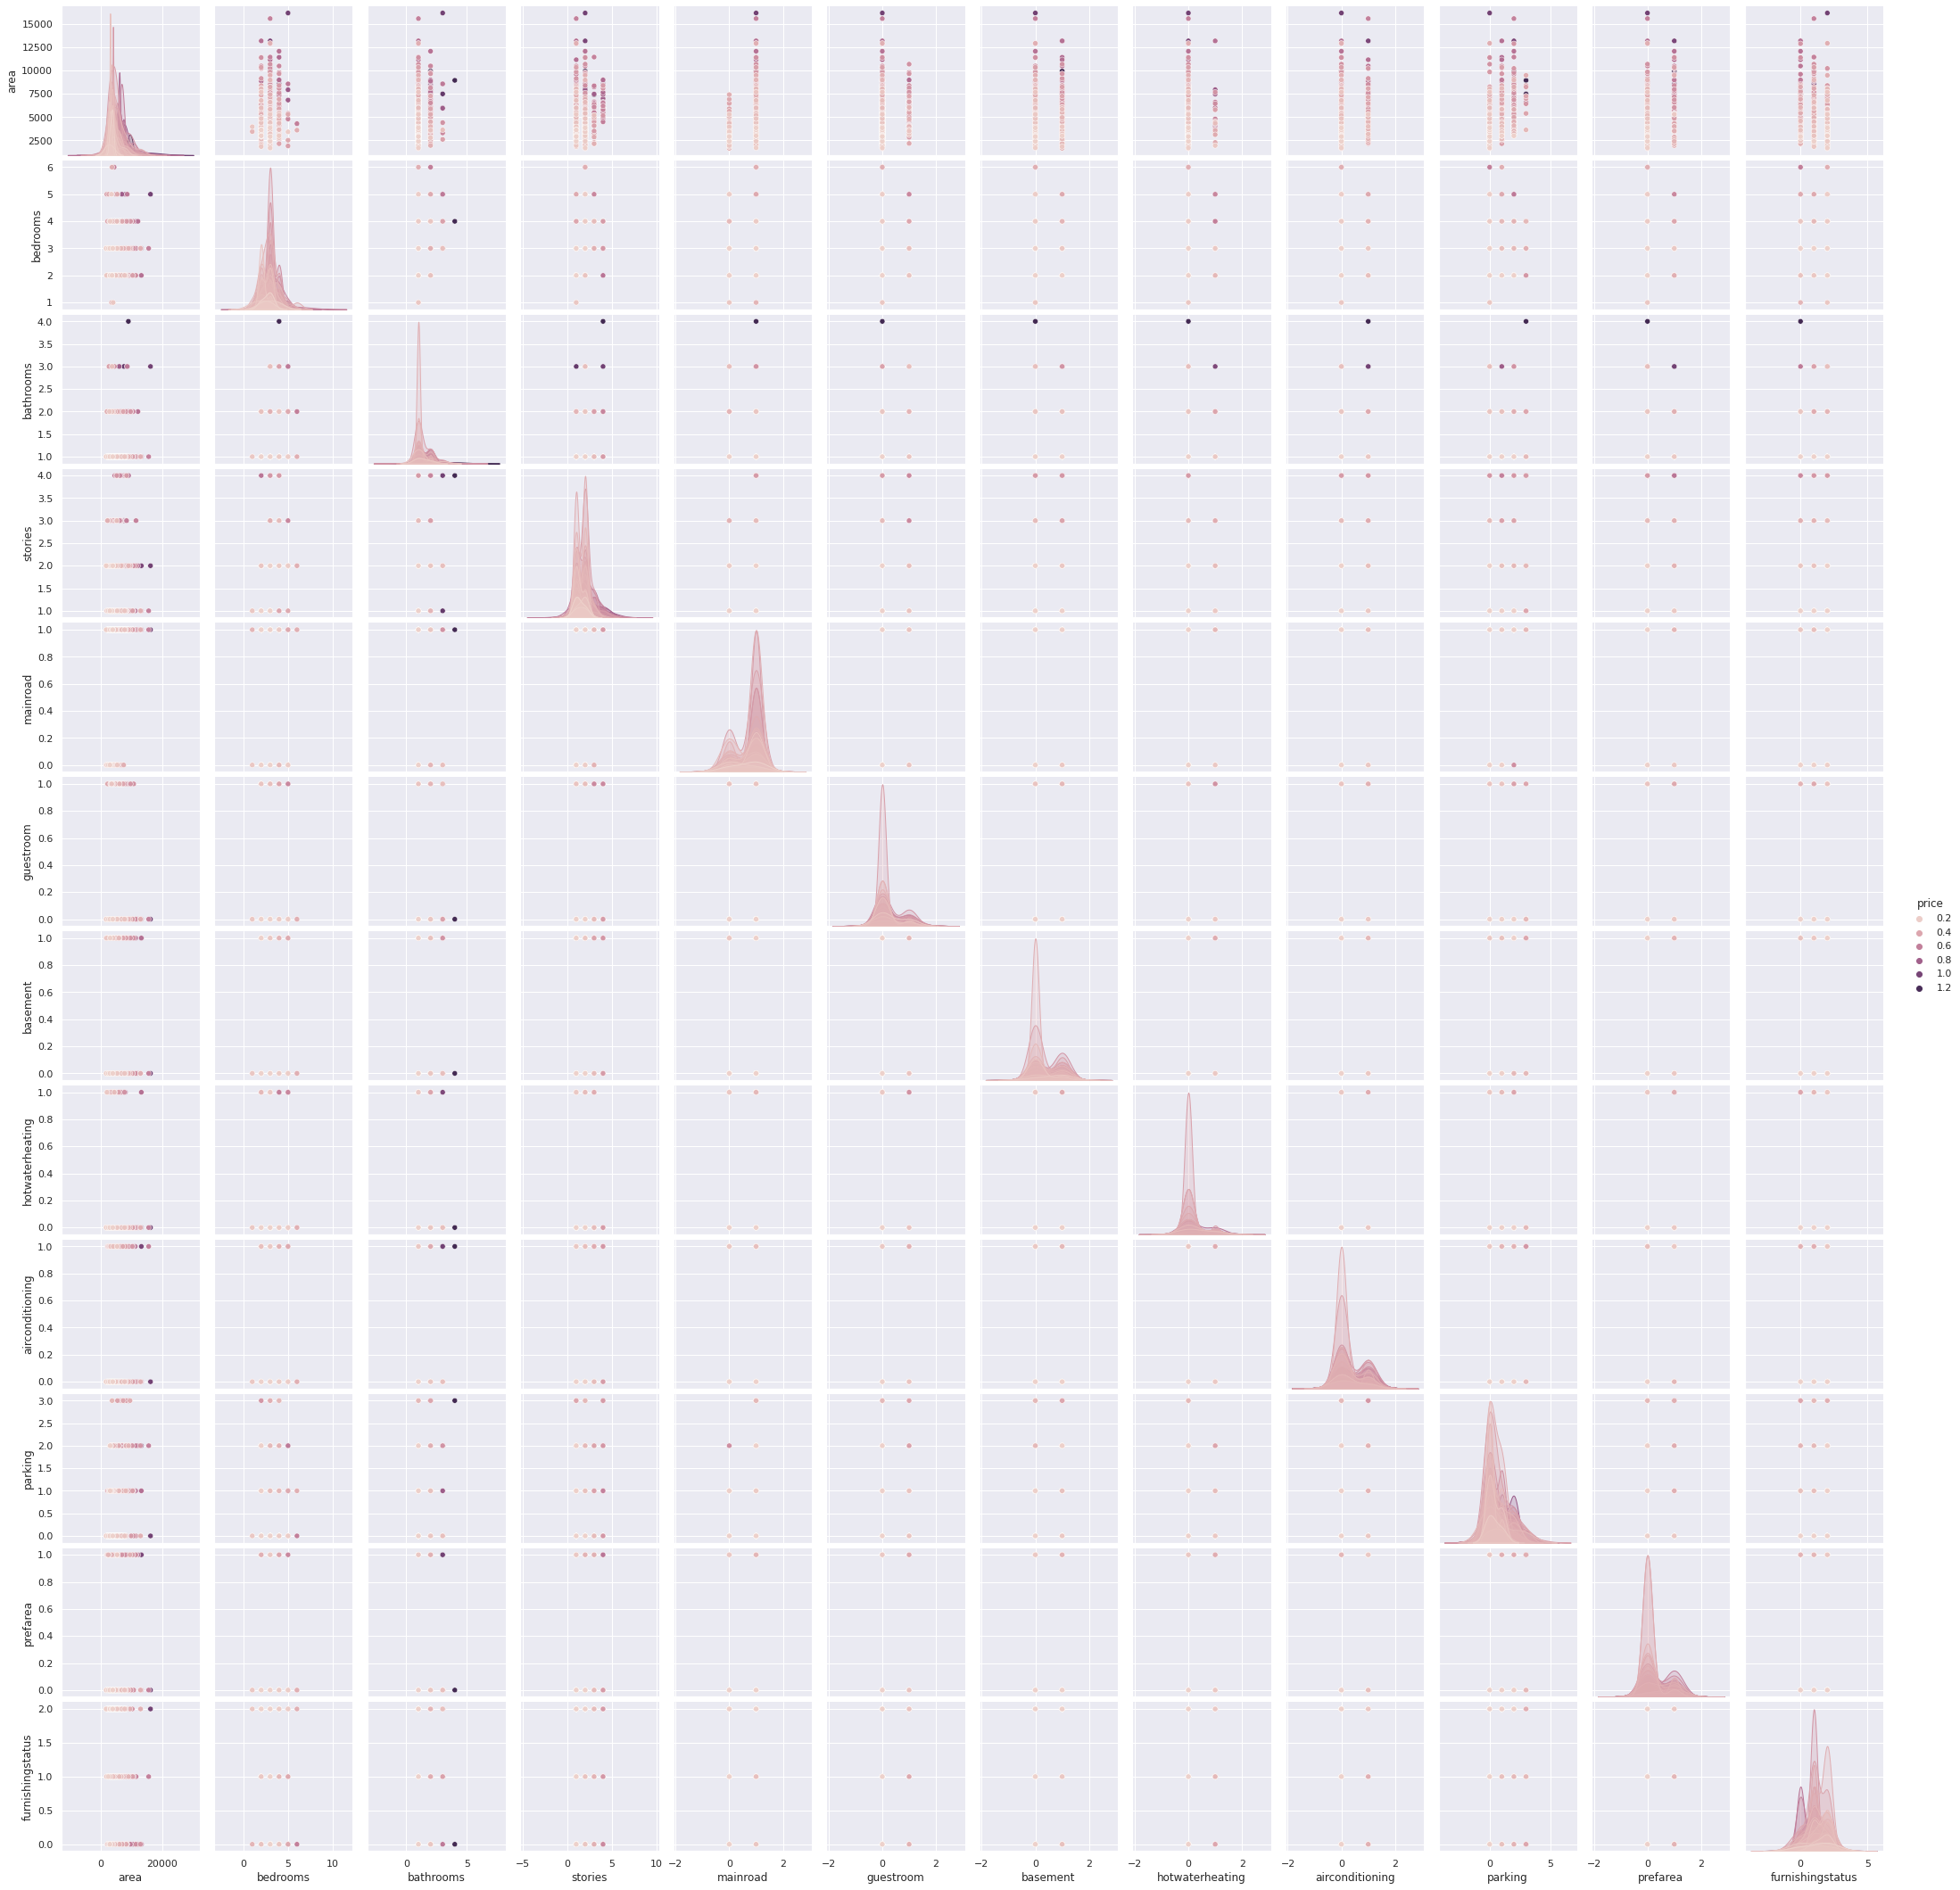

In [121]:
sns.set()
sns.pairplot(housingData, hue='price', height=2.5);

In [122]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
L = ["price", "area"]
for i in L:
    housingData[[i]] = scaler.fit_transform(housingData[[i]])
    
housingData

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,4,2,3,1,0,0,0,1,2,1,0
1,0.909091,0.502405,4,4,4,1,0,0,0,1,3,0,0
2,0.909091,0.571134,3,2,2,1,0,1,0,0,2,1,1
3,0.906061,0.402062,4,2,2,1,0,1,0,1,3,1,0
4,0.836364,0.396564,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.006061,0.092784,2,1,1,1,0,1,0,0,2,0,2
541,0.001485,0.051546,3,1,1,0,0,0,0,0,0,0,1
542,0.000000,0.135395,2,1,1,1,0,0,0,0,0,0,2
543,0.000000,0.086598,3,1,1,0,0,0,0,0,0,0,0


In [123]:
target = "price"
X = housingData.iloc[:,housingData.columns != target]
Y = housingData.iloc[:,housingData.columns.get_loc(target)]
train_ratio = 0.80
test_ratio = 0.20
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size= 1- train_ratio, random_state = 2021)
print("Training Data: ")
print(X_train)
print("Testing Data: ")
print(X_test)

Training Data: 
         area  bedrooms  bathrooms  ...  parking  prefarea  furnishingstatus
222  0.516564         2          1  ...        2         0                 1
467  0.109278         3          1  ...        2         0                 1
37   0.505155         4          2  ...        2         0                 0
312  0.134021         3          1  ...        0         1                 0
192  0.340206         3          1  ...        0         1                 0
..        ...       ...        ...  ...      ...       ...               ...
44   0.298969         4          2  ...        1         0                 0
128  0.264605         3          1  ...        1         0                 0
57   0.505155         4          2  ...        1         1                 0
341  0.105155         2          2  ...        2         0                 1
116  0.360825         3          2  ...        0         1                 2

[436 rows x 12 columns]
Testing Data: 
         area  bedro

##**1)** Use a simple Decision Tree regressor to predict the price of a house (without any validation) and report the accuracy.

In [124]:
def MSE(observedValues, predictedValues):
    _sum = 0
    observedValues = observedValues.tolist()
    predictedValues = predictedValues.tolist()
    for i in range(len(observedValues)):
        _sum = _sum + (observedValues[i]-predictedValues[i])*(observedValues[i]-predictedValues[i])
    _sum = _sum/len(observedValues)
    return _sum

In [125]:
# Simple Decision Tree Regressor to predict the price of a house
Regression_Tree = DecisionTreeRegressor()
Regression_Tree.fit(X_train, Y_train)
Predictions = Regression_Tree.predict(X_test)
MSE(Y_test, Predictions)

0.02013958379086949

##**2)** Perform 5-fold cross-validation to determine what the best max_depth would be for a single regression tree using the entire 'Xtrain' feature set.

In [126]:
def KFold(datasetX, datasetY, folds):
    _5foldDataX = np.array_split(datasetX, folds)
    _5foldDataY = np.array_split(datasetY, folds)
    return _5foldDataX, _5foldDataY

_5foldDataX, _5foldDataY = KFold(X_train, Y_train, 5)
print(_5foldDataX)
print(_5foldDataY)

[         area  bedrooms  bathrooms  ...  parking  prefarea  furnishingstatus
222  0.516564         2          1  ...        2         0                 1
467  0.109278         3          1  ...        2         0                 1
37   0.505155         4          2  ...        2         0                 0
312  0.134021         3          1  ...        0         1                 0
192  0.340206         3          1  ...        0         1                 0
..        ...       ...        ...  ...      ...       ...               ...
77   0.333333         3          2  ...        0         1                 0
374  0.128522         2          2  ...        0         0                 1
493  0.158763         3          1  ...        0         0                 0
6    0.476289         4          3  ...        2         1                 1
48   0.182131         3          2  ...        1         0                 2

[88 rows x 12 columns],          area  bedrooms  bathrooms  ...  parking  

In [127]:
def Avg(lst):
    return sum(lst) / len(lst)

In [128]:
# Determining the best max_depth for a single regression tree using the entire 'Xtrain' feature set.

# Creating an empty Dictionary
Dict = {}
for k in range(1,50):
    L = []
    for i in range(len(_5foldDataX)):
        _trainDataPartsX = []
        _trainDataPartsY = []        
        for j in range(len(_5foldDataX)):
            if j == i:
                _testDataX = _5foldDataX[j]
                _testDataY = _5foldDataY[j]
            else:
                _trainDataPartsX.append(_5foldDataX[j])
                _trainDataPartsY.append(_5foldDataY[j])
        _trainDataX = pd.concat(_trainDataPartsX)
        _trainDataY = pd.concat(_trainDataPartsY)
        Regression_Tree = DecisionTreeRegressor(max_depth = k)
        Regression_Tree.fit(_trainDataX, _trainDataY)
        Predictions = Regression_Tree.predict(_testDataX)
        L.append(mse(_testDataY, Predictions))
    Dict[k] = Avg(L)

best_max_depth = [key for key in Dict if Dict[key] == min(Dict.values())]
best_max_depth

[4]

In [129]:
Dict

{1: 0.017475481908386735,
 2: 0.014798346187198202,
 3: 0.013635232546559123,
 4: 0.012639744460616895,
 5: 0.012773403776266562,
 6: 0.013898773723180722,
 7: 0.014745260410393538,
 8: 0.015708293602165378,
 9: 0.01605698259712798,
 10: 0.014822079622878948,
 11: 0.016006888991280287,
 12: 0.01769210213514511,
 13: 0.016939851443226125,
 14: 0.015656096809018832,
 15: 0.016680763578145717,
 16: 0.017091096673133018,
 17: 0.016559464708255946,
 18: 0.01713673431758846,
 19: 0.016148621705777255,
 20: 0.01675851275444832,
 21: 0.017802301071607116,
 22: 0.016672347651981327,
 23: 0.015901328201915612,
 24: 0.015206676808936712,
 25: 0.017345697097770715,
 26: 0.016081660376923986,
 27: 0.017346499189386026,
 28: 0.016484292777182868,
 29: 0.015270300372394985,
 30: 0.01739060571179161,
 31: 0.016369240801359274,
 32: 0.015901111775300264,
 33: 0.017128501511913093,
 34: 0.016522000168374157,
 35: 0.01663049419818015,
 36: 0.016566912948881806,
 37: 0.017397934900419604,
 38: 0.017017503

##**3)** Visualize and summarize the results across the validation sets.

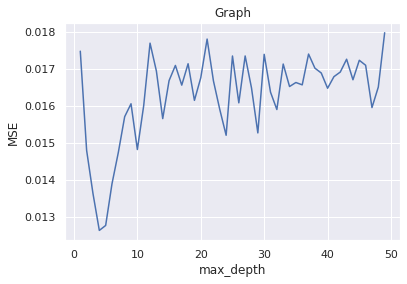

In [130]:
myList = Dict.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.plot(x, y)
plt.title("Graph")
plt.xlabel("max_depth")
plt.ylabel("MSE")
plt.show()

##**4)** Apply bagging to create different training datasets (select n_estimators = 10)

In [131]:
# Bagging

n_estimators = 10
trainingSets = []
for i in range(n_estimators):
    trainingSet = housingData.sample(frac=0.8, replace=True, random_state=i)
    trainingSets.append(trainingSet)

trainingSets

[        price      area  bedrooms  ...  parking  prefarea  furnishingstatus
 192  0.284848  0.340206         3  ...        0         1                 0
 359  0.169697  0.134021         3  ...        1         0                 2
 9    0.696970  0.281787         3  ...        1         1                 2
 277  0.221212  0.598625         2  ...        1         1                 1
 70   0.436364  0.161512         3  ...        0         1                 1
 ..        ...       ...       ...  ...      ...       ...               ...
 429  0.136364  0.214777         4  ...        0         0                 2
 229  0.254545  0.550997         4  ...        1         0                 1
 400  0.151515  0.127973         2  ...        1         1                 2
 153  0.327273  0.113402         3  ...        0         0                 1
 119  0.363636  0.369072         3  ...        2         1                 1
 
 [436 rows x 13 columns],
         price      area  bedrooms  ...  parking

##**5)** Train on different dataset to obtain different decision trees.

In [132]:
# Training on different datasets to obtain different decision trees.
models = []
for i in range(n_estimators):
    regressionTree = DecisionTreeRegressor()
    x_train = trainingSets[i].loc[:, housingData.columns != 'price']
    y_train = trainingSets[i].loc[:, "price"]
    regressionTree.fit(x_train, y_train)
    models.append(regressionTree)
models

[DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor()]

##**6)** Summarize how each of the separate trees performed (both numerically and visually) using R-squared score as the metric. How do they perform on average?


--> Performance Numerically
R-Squared score for the tree 1 is 0.6903084925927104

-->Performance Visually
Visualization of predicted values for tree 1



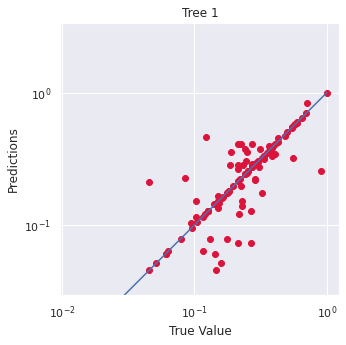


--> Performance Numerically
R-Squared score for the tree 2 is 0.610073756135169

-->Performance Visually
Visualization of predicted values for tree 2



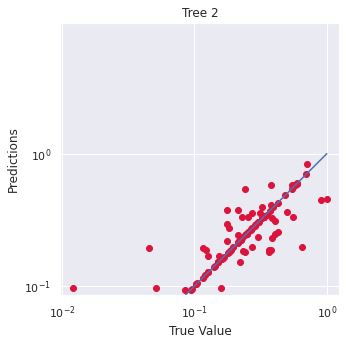


--> Performance Numerically
R-Squared score for the tree 3 is 0.6775841749685649

-->Performance Visually
Visualization of predicted values for tree 3



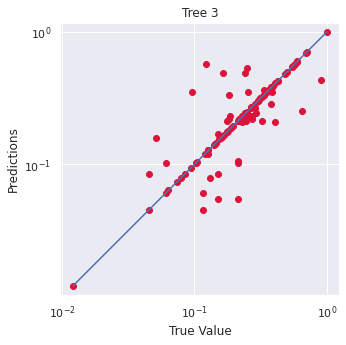


--> Performance Numerically
R-Squared score for the tree 4 is 0.7417244148652222

-->Performance Visually
Visualization of predicted values for tree 4



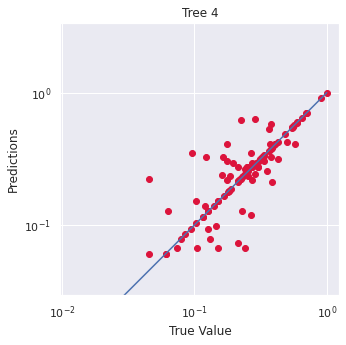


--> Performance Numerically
R-Squared score for the tree 5 is 0.534647195296991

-->Performance Visually
Visualization of predicted values for tree 5



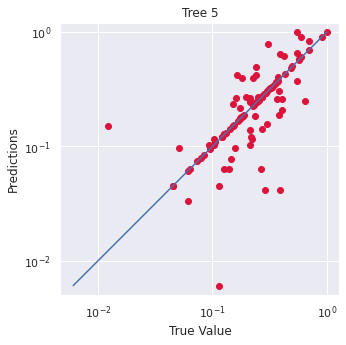


--> Performance Numerically
R-Squared score for the tree 6 is 0.7355270964534691

-->Performance Visually
Visualization of predicted values for tree 6



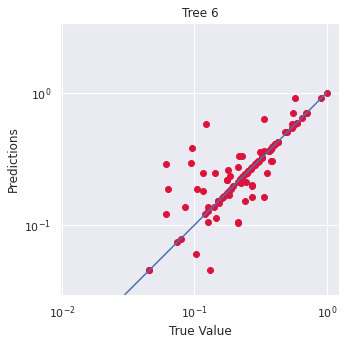


--> Performance Numerically
R-Squared score for the tree 7 is 0.5106789046573497

-->Performance Visually
Visualization of predicted values for tree 7



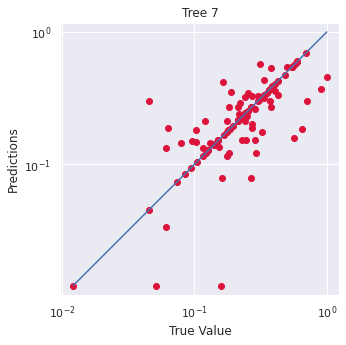


--> Performance Numerically
R-Squared score for the tree 8 is 0.7026597222278386

-->Performance Visually
Visualization of predicted values for tree 8



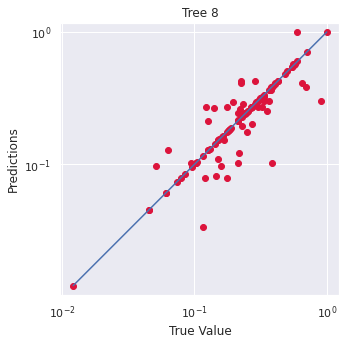


--> Performance Numerically
R-Squared score for the tree 9 is 0.6594714899123686

-->Performance Visually
Visualization of predicted values for tree 9



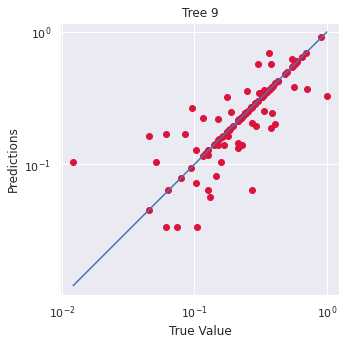


--> Performance Numerically
R-Squared score for the tree 10 is 0.7534660672783651

-->Performance Visually
Visualization of predicted values for tree 10



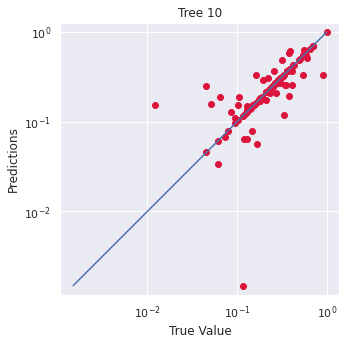

In [133]:
from sklearn.metrics import r2_score
r2Score = []
Dict = {}
for i in range(n_estimators):
    Predictions = models[i].predict(X_test)
    r2Score.append(r2_score(Y_test, Predictions))
    plt.figure(figsize=(5,5))
    plt.scatter(Y_test, Predictions, c = 'crimson')
    plt.yscale('log')
    plt.xscale('log')
    p1 = max(max(Predictions),max(Y_test))
    p2 = min(min(Predictions),min(Y_test))
    plt.plot([p1,p2], [p1,p2], 'b-')
    plt.title(f"Tree {i+1}")
    plt.xlabel('True Value')
    plt.ylabel('Predictions')
    plt.axis('equal')
    print("\n--> Performance Numerically")
    print(f"R-Squared score for the tree {i+1} is {r2_score(Y_test, Predictions)}\n")
    print("-->Performance Visually")
    print(f"Visualization of predicted values for tree {i+1}\n")
    plt.show()
    Dict[i+1] = r2_score(Y_test, Predictions)

In [134]:
Dict

{1: 0.6903084925927104,
 2: 0.610073756135169,
 3: 0.6775841749685649,
 4: 0.7417244148652222,
 5: 0.534647195296991,
 6: 0.7355270964534691,
 7: 0.5106789046573497,
 8: 0.7026597222278386,
 9: 0.6594714899123686,
 10: 0.7534660672783651}

In [135]:
for i in range(n_estimators):
    print(f"R-squared score for model/tree {i+1} is {r2Score[i]}")

print(f"On average the r2Score is {sum(r2Score)/len(r2Score)}")

R-squared score for model/tree 1 is 0.6903084925927104
R-squared score for model/tree 2 is 0.610073756135169
R-squared score for model/tree 3 is 0.6775841749685649
R-squared score for model/tree 4 is 0.7417244148652222
R-squared score for model/tree 5 is 0.534647195296991
R-squared score for model/tree 6 is 0.7355270964534691
R-squared score for model/tree 7 is 0.5106789046573497
R-squared score for model/tree 8 is 0.7026597222278386
R-squared score for model/tree 9 is 0.6594714899123686
R-squared score for model/tree 10 is 0.7534660672783651
On average the r2Score is 0.6616141314388049


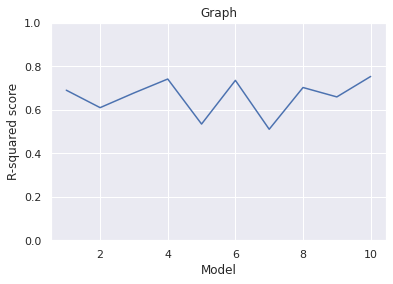

In [136]:
myList = Dict.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.plot(x, y)
plt.title("Graph")
plt.xlabel("Model")
plt.ylabel("R-squared score")
plt.ylim(0, 1)
plt.show()

##**7)** Combine the trees into one prediction and evaluate it using R-squared score.


--> Performance Numerically
R-Squared score for the combined tree is: 0.8922382916116864

-->Performance Visually
Visualization of predicted values for the combined tree is:



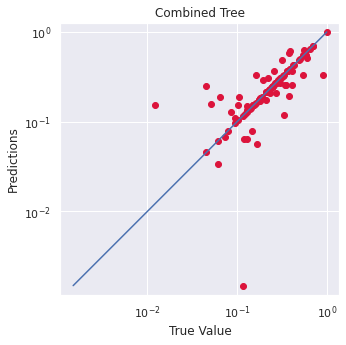

In [137]:
_Predictions = []
for i in range(n_estimators):
    Predictions = models[i].predict(X_test)
    _Predictions.append(Predictions)

_CombinedPredictions = []
for i in range(len(X_test)):
    sum = 0
    for j in range(len(_Predictions)):
        sum = sum + _Predictions[j][i]
    sum = sum/len(_Predictions)
    _CombinedPredictions.append(sum)

r2_score(Y_test, _CombinedPredictions)
plt.figure(figsize=(5,5))
plt.scatter(Y_test, Predictions, c = 'crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(Predictions),max(Y_test))
p2 = min(min(Predictions),min(Y_test))
plt.plot([p1,p2], [p1,p2], 'b-')
plt.title(f"Combined Tree")
plt.xlabel('True Value')
plt.ylabel('Predictions')
plt.axis('equal')
print("\n--> Performance Numerically")
print(f"R-Squared score for the combined tree is: {r2_score(Y_test, _CombinedPredictions)}\n")
print("-->Performance Visually")
print(f"Visualization of predicted values for the combined tree is:\n")
plt.show()
# Y_test

##**8)** How will the results above change if 'max_depth' is increased? What if it is decreased?

In [142]:
Dict = {}
for k in range(1,80):
    models = []
    for i in range(n_estimators):
        regressionTree = DecisionTreeRegressor(max_depth=k)
        x_train = trainingSets[i].loc[:, housingData.columns != 'price']
        y_train = trainingSets[i].loc[:, "price"]
        regressionTree.fit(x_train, y_train)
        models.append(regressionTree)
    _Predictions = []
    for i in range(n_estimators):
        Predictions = models[i].predict(X_test)
        _Predictions.append(Predictions)
    _CombinedPredictions = []
    for i in range(len(X_test)):
        sum = 0
        for j in range(len(_Predictions)):
            sum = sum + _Predictions[j][i]
        sum = sum/len(_Predictions)
        _CombinedPredictions.append(sum)
    # print(r2_score(Y_test, _CombinedPredictions))
    Dict[k] = r2_score(Y_test, _CombinedPredictions)

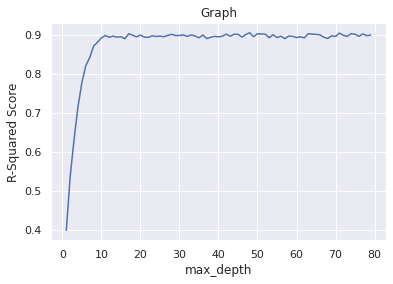

In [144]:
myList = Dict.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.plot(x, y)
plt.title("Graph")
plt.xlabel("max_depth")
plt.ylabel("R-Squared Score")
plt.show()

##**9)** Train random forest regressor, report mean squared error and mean absolute error. (from sklearn.ensemble import RandomForestRegressor)

In [140]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
regr = RandomForestRegressor()
regr.fit(X_train, Y_train)
Predictions = regr.predict(X_test)
print("MSE: ", MSE(Y_test, Predictions))
print("MAE: ", mean_absolute_error(Y_test, Predictions))

MSE:  0.012686472420285427
MAE:  0.07401366363503978


##**10)** Train Adaboost regressor, report mean squared error and mean absolute error. (from sklearn.ensemble.AdaBoostRegressor)

In [141]:
from sklearn.ensemble import AdaBoostRegressor
abregr = AdaBoostRegressor()
abregr.fit(X_train, Y_train)
Predictions = abregr.predict(X_test)
print("MSE: ", MSE(Y_test, Predictions))
print("MAE: ", mean_absolute_error(Y_test, Predictions))

MSE:  0.01308860884364702
MAE:  0.08276128208166425


#**Question-2**

##Importing the Necessary Python Libraries and Components

In [4]:
""" For installing XgBoost write the following command in one of the colab cell. """
!pip install xgboost

""" For installing LightGBM write the following """
!pip install lightgbm

##**0)** Input the Dataset

In [6]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/LAB-3/Breast_cancer_data.csv")
dataset.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [7]:
dataset

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [11]:
# Checking for null values in the dataset.
dataset.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [12]:
# Checking for the categorical data in the dataset.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [13]:
dataset.shape

(569, 6)

##**1)** Use a simple Decision Tree classifier to predict the outcome (without any validation) and report the accuracy.

###Split Dataset

In [14]:
""" For Performing Classification first I am splitting the dataset into training and testing sets. """
# Target attribute
Y = dataset.iloc[:,-1]                                
X = dataset
x_train, x_test, y_train, y_test = tts(X, Y, test_size = 0.2, random_state = 2000)

###Decision Tree Classifier

In [15]:
""" Implementing the Entropy function """
def entropy(y):
    # Counting the number of occurrences of each value in array of non-negative ints.
    occurance = np.bincount(y)
    # Since we have to deal with proportion.
    P = occurance / len(y)
    # Calculating the entropy
    entropy = -np.sum([p * np.log2(p) for p in P if p > 0])
    return entropy
# Parent Entropy
entropy(dataset["diagnosis"])

0.9526351224018599

In [16]:
# Storing all the continuous variables in the dataset. (Since we have to convert the columns that contains continuous data to categorical data)
continuousVariable = []
for i in dataset.columns:
    if(dataset[i].dtype == 'float64'):
        continuousVariable.append(i)
print(continuousVariable)

['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']


In [17]:
# Implementing the function to calculate the information gain of particular attribute.
def information_gain(dataset, S, Attribute):
    # Overall Entropy of S.
    # First the entropy of the total dataset is calculated
    len_of_dataset = len(dataset[S])
    informationGain = entropy(dataset[S])
    for values in dataset[Attribute].unique():
        # The dataset is then split on different attributes
        subset_of_dataset = dataset[dataset[Attribute] == values]
        # Using the formula of informationGain as discussed in slides.
        informationGain = informationGain - len(subset_of_dataset[S])*entropy(subset_of_dataset[S])/len_of_dataset
    return informationGain

In [18]:
def split_into_two_categories(dataset, column, threshold):
    # Iterating in each column
    for i in dataset[column]:
        # if value is less than threshold replace it by 0 else replace it by 1.
        if i < threshold:
            dataset[column] = dataset[column].replace(i, '0')
        else:
            dataset[column] = dataset[column].replace(i, '1')
    return dataset

In [19]:
# Storing the best possible splits threshold of each column.
# Since it will help to convert the x_test data into desired format.
storeBestSplitThresholds = {}

def cont_to_cat(dataset, target, column):
    # Initialized best_info_gain to -1 and best_split_threshold to -1 as well.
    best_info_gain = -1
    best_split_threshold = -1
    # Iterating over column for each unique value calculating the info_gain and simulatenously updating the best_info_gain.
    for value in dataset[column].unique():
        temp = dataset.copy()
        temp = split_into_two_categories(temp, column, value)
        info_gain = information_gain(temp, target, column)
        # IF info gain is more than best info gain we update best info gain also update the threshold value.
        if(info_gain > best_info_gain):
            best_info_gain = info_gain
            best_split_threshold = value

    storeBestSplitThresholds[column] = best_split_threshold
    dataframe = split_into_two_categories(dataset, column, best_split_threshold)
    print(column, best_split_threshold, best_info_gain)        

# Converting each continuous variable to categorical data.
for i in continuousVariable:
    cont_to_cat(x_train, "diagnosis", i)

mean_radius 15.05 0.4699693435286987
mean_texture 18.47 0.16072790627914668
mean_perimeter 100.0 0.46731362114128605
mean_area 698.8 0.4846375051996491
mean_smoothness 0.08947 0.08859444511115933


In [20]:
print(storeBestSplitThresholds)

{'mean_radius': 15.05, 'mean_texture': 18.47, 'mean_perimeter': 100.0, 'mean_area': 698.8, 'mean_smoothness': 0.08947}


In [21]:
x_train

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
471,0,1,0,0,0,1
324,0,0,0,0,0,1
414,1,1,0,1,0,0
378,0,0,0,0,0,1
113,0,1,0,0,1,1
...,...,...,...,...,...,...
183,0,0,0,0,1,1
412,0,1,0,0,0,1
284,0,0,0,0,0,1
566,1,1,1,1,0,0


In [22]:
def best_attribute(dataset, target):
    # Initialized the best info gain to -1 and best attribute to None
    best_info_gain = -1
    best_attribute = None
    # Iterating over each columns in dataset and calculating the information gain for each attribute.
    # The attribute that yields the largest IG is chosen for the decision node.
    for columns in dataset.columns:
        if columns != target:
            info_gain = information_gain(dataset, target, columns)
            if(info_gain > best_info_gain):
                best_info_gain = info_gain
                best_attribute = columns
    return best_attribute, best_info_gain

print(best_attribute(x_train, "diagnosis"))

('mean_area', 0.4846375051996491)


In [23]:
for i in continuousVariable:
    x_train = x_train.astype({i:'int'})

In [24]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 471 to 206
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   mean_radius      455 non-null    int64
 1   mean_texture     455 non-null    int64
 2   mean_perimeter   455 non-null    int64
 3   mean_area        455 non-null    int64
 4   mean_smoothness  455 non-null    int64
 5   diagnosis        455 non-null    int64
dtypes: int64(6)
memory usage: 24.9 KB


In [25]:
def make_that_split(dataset, attribute):
    # Storing 0s in left.
    left = dataset[dataset[attribute]==0]
    # Storing 1s in right.
    right = dataset[dataset[attribute]==1]    
    return left, right

In [26]:
def create_dict(column):
    # Initializing the dictionary to store the class frequency count.
    store_class_freq_count = {}
    # Unique values in column.
    classes = list(set(column))
    for i in range(len(classes)):
        store_class_freq_count[classes[i]] = 0
    for i in column:
        store_class_freq_count[i] += 1;
    return store_class_freq_count    

In [27]:
class Leaf:
    def __init__(self, target, dataset):
        self.predictions = create_dict(dataset[target])

In [28]:
class Decision_Node:
    def __init__(self, Name = None, Left = None, Right = None):
        self.Name = Name
        self.Left = Left
        self.Right = Right

In [29]:
def build_tree(dataset, target, depth):
    attribute, info_gain = best_attribute(dataset, target)
    left, right = make_that_split(dataset, attribute)

    # --------------------------------------------- (PART OF QUESTION OF 5) ---------------------------------------------
    # There should be a max depth that should be defined i.e. a depth after which the tree shouldn’t be allowed to grow
    # The algorithm should self-identify when there is no information gain being done, i.e. the model has plateaued in it’s training and shouldn’t grow further.
    max_depth = 3
    if(entropy(dataset[target]) == 0 or depth >= max_depth):
        leaf = Leaf(target, dataset)
        return leaf

    T_left = build_tree(left, target, depth+1)
    T_right = build_tree(right, target, depth+1)
    Node = Decision_Node(attribute, T_left,T_right)
    return Node

Tree = build_tree(x_train, "diagnosis", 0)

In [30]:
def print_tree(node, spacing=""):
    
    if isinstance(node, Leaf):
        print(spacing + "Predict", node.predictions)
        return
    print(spacing + str(node.Name))
    print(spacing + '---> Left:')
    print_tree(node.Left, spacing + "   ")
    print(spacing + '---> Right:')
    print_tree(node.Right, spacing + "   ")

In [31]:
print_tree(Tree)

mean_area
---> Left:
   mean_texture
   ---> Left:
      mean_smoothness
      ---> Left:
         Predict {1: 74}
      ---> Right:
         Predict {0: 5, 1: 100}
   ---> Right:
      mean_smoothness
      ---> Left:
         Predict {0: 1, 1: 54}
      ---> Right:
         Predict {0: 31, 1: 49}
---> Right:
   mean_texture
   ---> Left:
      mean_perimeter
      ---> Left:
         Predict {1: 1}
      ---> Right:
         Predict {0: 23, 1: 7}
   ---> Right:
      mean_smoothness
      ---> Left:
         Predict {0: 19, 1: 1}
      ---> Right:
         Predict {0: 90}


In [32]:
X_test = x_test.copy()
for key in storeBestSplitThresholds:
    X_test = split_into_two_categories(X_test, key, storeBestSplitThresholds[key])
X_test.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
3,0,1,0,0,1,0
145,0,0,0,0,1,1
336,0,0,0,0,1,1
233,1,1,1,1,1,0
23,1,1,1,1,1,0


In [33]:
for i in continuousVariable:
    X_test = X_test.astype({i:'int'})

In [34]:
# Creating a list to store all the predicitons.
predictionsList = []

def majority(prediction):
    values = list(prediction.values())
    keys = list(prediction.keys())
    return keys[values.index(max(values))]

def classify(dataset, targetcolumn, node):
    # If it is a leaf node
    if isinstance(node, Leaf):
        # append the predictions in the Predictions list.
        predictionsList.append(majority(node.predictions))

    # else if it is a decision node we will classify it.
    if isinstance(node, Decision_Node):
        if dataset[node.Name] == 1:
            classify(dataset, targetcolumn, node.Right)
        else:
            classify(dataset, targetcolumn, node.Left)

index = X_test.index.tolist()
for i in range(len(index)):
    classify(X_test.loc[index[i]], "diagnosis", Tree)

###Report the accuracy

In [36]:
accuracy = acc(y_test, predictionsList)
print("accuracy:",accuracy*100, "%")

accuracy: 87.71929824561403 %


##**2)** Perform 5-fold cross-validation to determine what the best max_depth would be for a single regression tree using the entire 'Xtrain' feature set.

In [38]:
""" Splitting the dataset into training and testing dataset """
target = "diagnosis"
X = dataset.iloc[:,dataset.columns != target]
Y = dataset.iloc[:,dataset.columns.get_loc(target)]
train_ratio = 0.80
test_ratio = 0.20
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size= 1- train_ratio, random_state = 2021)
print("Training Data: ")
print(X_train)
print("Testing Data: ")
print(X_test)

Training Data: 
     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
269       10.710         20.39           69.50      344.9          0.10820
51        13.640         16.34           87.21      571.8          0.07685
187       11.710         17.19           74.68      420.3          0.09774
28        15.300         25.27          102.40      732.4          0.10820
199       14.450         20.22           94.49      642.7          0.09872
..           ...           ...             ...        ...              ...
44        13.170         21.81           85.42      531.5          0.09714
128       15.100         16.39           99.58      674.5          0.11500
57        14.710         21.59           95.55      656.9          0.11370
341        9.606         16.84           61.64      280.5          0.08481
116        8.950         15.76           58.74      245.2          0.09462

[455 rows x 5 columns]
Testing Data: 
     mean_radius  mean_texture  mean_perimete

In [40]:
def KFold(datasetX, datasetY, folds):
    _5foldDataX = np.array_split(datasetX, folds)
    _5foldDataY = np.array_split(datasetY, folds)
    return _5foldDataX, _5foldDataY

_5foldDataX, _5foldDataY = KFold(X_train, Y_train, 5)
print(_5foldDataX)
print(_5foldDataY)

[     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
269        10.71         20.39           69.50      344.9          0.10820
51         13.64         16.34           87.21      571.8          0.07685
187        11.71         17.19           74.68      420.3          0.09774
28         15.30         25.27          102.40      732.4          0.10820
199        14.45         20.22           94.49      642.7          0.09872
..           ...           ...             ...        ...              ...
510        11.74         14.69           76.31      426.0          0.08099
58         13.05         19.31           82.61      527.2          0.08060
15         14.54         27.54           96.73      658.8          0.11390
282        19.40         18.18          127.20     1145.0          0.10370
137        11.43         15.39           73.06      399.8          0.09639

[91 rows x 5 columns],      mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness


In [89]:
def Avg(lst):
    return sum(lst)/len(lst)

In [95]:
# Determining the best max_depth for a single regression tree using the entire 'Xtrain' feature set.

# Creating an empty Dictionary
Dict = {}
for k in range(1,50):
    L = []
    for i in range(len(_5foldDataX)):
        _trainDataPartsX = []
        _trainDataPartsY = []        
        for j in range(len(_5foldDataX)):
            if j == i:
                _testDataX = _5foldDataX[j]
                _testDataY = _5foldDataY[j]
            else:
                _trainDataPartsX.append(_5foldDataX[j])
                _trainDataPartsY.append(_5foldDataY[j])
        _trainDataX = pd.concat(_trainDataPartsX)
        _trainDataY = pd.concat(_trainDataPartsY)
        Classifier_Tree = DecisionTreeClassifier(max_depth = k)
        Classifier_Tree.fit(_trainDataX, _trainDataY)
        Predictions = Classifier_Tree.predict(_testDataX)
        L.append(mse(_testDataY, Predictions))
    Dict[k] = Avg(L)

best_max_depth = [key for key in Dict if Dict[key] == min(Dict.values())]
print(f"best max depth is: {best_max_depth[0]}")

best max depth is: 6


In [96]:
Dict

{1: 0.11208791208791209,
 2: 0.11648351648351649,
 3: 0.14285714285714285,
 4: 0.12527472527472527,
 5: 0.11648351648351647,
 6: 0.1010989010989011,
 7: 0.10769230769230771,
 8: 0.1098901098901099,
 9: 0.10769230769230771,
 10: 0.10769230769230768,
 11: 0.1054945054945055,
 12: 0.1098901098901099,
 13: 0.10769230769230771,
 14: 0.1098901098901099,
 15: 0.1098901098901099,
 16: 0.10769230769230768,
 17: 0.1098901098901099,
 18: 0.1098901098901099,
 19: 0.11208791208791209,
 20: 0.1098901098901099,
 21: 0.10329670329670329,
 22: 0.1098901098901099,
 23: 0.10549450549450548,
 24: 0.10769230769230771,
 25: 0.10769230769230768,
 26: 0.10769230769230768,
 27: 0.11208791208791209,
 28: 0.11208791208791209,
 29: 0.10329670329670329,
 30: 0.1054945054945055,
 31: 0.11208791208791209,
 32: 0.10329670329670329,
 33: 0.1098901098901099,
 34: 0.10549450549450548,
 35: 0.10549450549450548,
 36: 0.1054945054945055,
 37: 0.10769230769230768,
 38: 0.1098901098901099,
 39: 0.11208791208791209,
 40: 0.11

##**3)** Visualize and summarize the results across the validation sets.

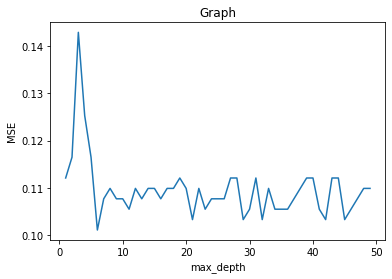

In [97]:
myList = Dict.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.plot(x, y)
plt.title("Graph")
plt.xlabel("max_depth")
plt.ylabel("MSE")
plt.show()

##**4)** Implement XGBoost in which subsample=0.7 and max_depth=4.

In [103]:
X = dataset[['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']]
y = dataset['diagnosis']
X_train, X_test, y_train, y_test = tts(X,y, test_size = 0.3, random_state = 2000)

In [104]:
import xgboost as xgb
clf = xgb.XGBClassifier(subsample=0.7, max_depth=4)
clf.fit(X_train, y_train)

XGBClassifier(max_depth=4, subsample=0.7)

##**5)** Print the accuracy on the training set and test set.

In [105]:
# Predictions for testing set.
y_pred = clf.predict(X_test)

In [106]:
# Predictions for training set.
y_pred_train = clf.predict(X_train)

In [108]:
print('Training set accuracy: {:.4f}'.format(acc(y_train, y_pred_train)))

print('Testing set accuracy: {:.4f}'.format(acc(y_test, y_pred)))

Training set accuracy: 0.9950
Testing set accuracy: 0.9240


##**6)** Implement LightGBM with max_depth value as 3 and choose different value for num_leaves.

In [109]:
X = dataset[['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']]
y = dataset['diagnosis']

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2000)

In [111]:
import lightgbm as lgb
accDict = {}
accDict2 = {}

for i in range(2, 25):
    clf = lgb.LGBMClassifier(max_depth = 3, num_leaves=i)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    accDict[i] = acc(y_pred, y_test)
    accDict2[i] = clf.score(X_train, y_train) - clf.score(X_test, y_test)

##**7)** Analyse the relation between max_depth and num_leaves, and check for which value the model starts overfitting?

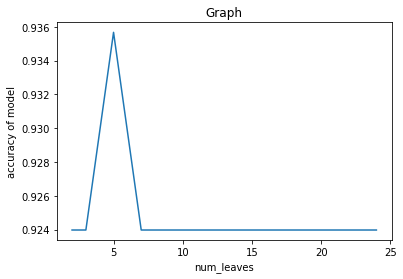

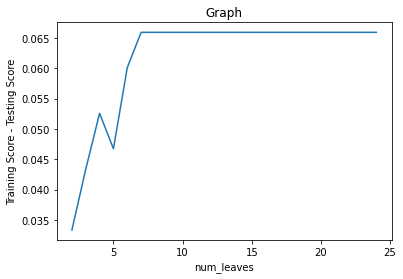

In [112]:
myList = accDict.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.plot(x, y)
plt.title("Graph")
plt.xlabel("num_leaves")
plt.ylabel("accuracy of model")
plt.show()

print(" ")

myList = accDict2.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.plot(x, y)
plt.title("Graph")
plt.xlabel("num_leaves")
plt.ylabel("Training Score - Testing Score")
plt.show()

##**8)** Report which parameters can be used for better accuracy and also which parameter can be used for avoiding overfitting.

In [ ]:
"""
Parameters that can be used for better accuracy are:

"""

# Use large num_leaves(may cause over-fitting)
# Use bigger training data
# Use large max_bin.
# Use small learning_rate with large num_iterations.

"""
Parameters that can be used to deal with over-fitting are:
"""

# Use small num_leaves
# Use bagging principle by set bagging_fraction and bagging_freq
# Use feature sub-sampling by set feature_fraction
# max_depth to avoid growing deep decision tree